In [1]:
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

In [2]:
plt.rcParams.update(
    {
        "font.size": 10,
        "text.usetex": True,
        "text.latex.preamble": r"\usepackage{amsfonts}\usepackage{bm}",
    }
)
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]
plt.rcParams["font.sans-serif"] = ["Computer Modern"]
plt.rcParams["font.monospace"] = ["Computer Modern"]
plt.rcParams["pgf.texsystem"] = "xelatex"  # o 'lualatex'

plt.rcParams["figure.figsize"] = (16, 9)
fontsize = 28
matplotlib.rcParams.update({"font.size": fontsize})

In [3]:
# Get all file names in current folder
files = os.listdir("cifar10")

In [4]:
# Concatenate all dataframes in a single one
a = []
for f in files:
    if f.endswith(".csv"):
        if "ella" in f and "ella_100_0.5" in f:
            continue
        a.append(pd.read_csv("cifar10/" + f))
df = pd.concat(a)

In [5]:
df["method"].unique()

array(['ella', 'fmgp', 'fmgp slow', 'lla last_layer full',
       'lla last_layer kron', 'map', 'mfvi', 'sngp', 'valla'],
      dtype=object)

In [6]:
resnets = df["resnet"].unique()
resnets.sort()
models = [
    "fmgp slow",
    "mfvi",
    "valla",
    "ella",
    "lla last_layer full",
    "lla last_layer kron",
    "sngp",
    "map",
]
labels = ["FMGP", "MFVI", "VaLLA", "ELLA", "LLA", "LLA KFAC", "SNGP", "MAP"]
print("Resnet models: ", resnets)
print("Models: ", models)

Resnet models:  ['resnet20' 'resnet32' 'resnet44' 'resnet56']
Models:  ['fmgp slow', 'mfvi', 'valla', 'ella', 'lla last_layer full', 'lla last_layer kron', 'sngp', 'map']


In [7]:
def std(x):
    return np.std(x) / len(x)

In [8]:
df = df.drop(["lower_da", "hessian"], axis=1)

In [9]:
# Group by "method" and "resnet" and compute average and std
df = df.groupby(["resnet", "method"]).agg(["mean", std])

In [10]:
df

NLL                     ACC                \
                                  mean           std      mean           std   
resnet   method                                                                
resnet20 ella                 0.232252  2.722410e-05  0.925627  6.432460e-06   
         fmgp                 0.227483  1.964924e-06  0.926200  0.000000e+00   
         fmgp slow            0.227487  3.071879e-06  0.926200  0.000000e+00   
         lla last_layer full  0.256627  4.979511e-09  0.925500  2.220446e-17   
         lla last_layer kron  0.265879  2.323316e-08  0.925500  2.220446e-17   
         map                  0.281522  0.000000e+00  0.926000  2.220446e-17   
         mfvi                 0.222248  3.615365e-04  0.928400  2.912044e-04   
         sngp                 0.262909  1.695384e-03  0.919480  2.840845e-04   
         valla                0.227307  8.614880e-05  0.926020  2.332381e-05   
resnet32 ella                 0.217724  2.782032e-04  0.934440  2.712932e-05   
         fmgp                 0.209903  2.586296e-06  0.934300  0.000000e+00   
         fmgp slow            0.209916  3.196630e-06  0.934300  0.000000e+00   
         lla last_layer full  0.237743  3.653962e-09  0.935000  2.220446e-17   
         lla last_layer kron  0.251803  2.392080e-09  0.935500  0.000000e+00   
         map                  0.292069  0.000000e+00  0.935300  0.000000e+00   
         mfvi                 0.211912  2.987784e-04  0.934900  6.196773e-05   
         sngp                 0.237043  9.262586e-04  0.933980  2.239286e-04   
         valla                0.209166  2.030497e-05  0.934260  9.797959e-06   
resnet44 ella                 0.206935  6.623550e-04  0.939340  1.170299e-04   
         fmgp                 0.198027  7.062055e-06  0.940000  2.220446e-17   
         fmgp slow            0.198024  6.041415e-06  0.940000  2.220446e-17   
         lla last_layer full  0.220814  3.088162e-09  0.939800  0.000000e+00   
         lla last_layer kron  0.230562  2.392080e-09  0.940000  2.220446e-17   
         map                  0.275259  0.000000e+00  0.940100  2.220446e-17   
         mfvi                 0.195677  3.656349e-04  0.939380  5.986652e-05   
         sngp                 0.232098  1.955951e-03  0.935260  2.415285e-04   
         valla                0.195838  3.217616e-05  0.940120  2.939388e-05   
resnet56 ella                 0.192408  9.287849e-05  0.944157  5.926765e-06   
         fmgp                 0.183003  2.982778e-06  0.943940  9.797959e-06   
         fmgp slow            0.183027  2.900027e-06  0.943940  9.797959e-06   
         lla last_layer full  0.200181  4.979511e-09  0.943500  0.000000e+00   
         lla last_layer kron  0.203735  4.367320e-09  0.943700  0.000000e+00   
         map                  0.252327  0.000000e+00  0.943700  0.000000e+00   
         mfvi                 0.182321  2.501671e-04  0.944020  1.586947e-04   
         sngp                 0.222348  1.289381e-03  0.940600  1.296148e-04   
         valla                0.183696  1.458116e-04  0.944040  9.797959e-06   

                                   ECE                   BRIER                \
                                  mean           std      mean           std   
resnet   method                                                                
resnet20 ella                 0.007551  5.014481e-05  0.111075  5.574519e-06   
         fmgp                 0.007443  1.119605e-05  0.110916  2.575770e-07   
         fmgp slow            0.007492  3.882136e-06  0.110915  4.776936e-07   
         lla last_layer full  0.020424  7.578380e-09  0.115027  1.826981e-09   
         lla last_layer kron  0.023892  3.319198e-08  0.116038  4.367320e-09   
         map                  0.038959  0.000000e+00  0.118698  0.000000e+00   
         mfvi                 0.013895  2.810904e-04  0.106709  1.944631e-04   
         sngp                 0.009336  1.006162e-03  0.120401  3.905920e-04   
         valla                0.01

C:\Users\Ludvins\AppData\Local\Temp\ipykernel_44512\596484088.py:166: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0][1].set_xticklabels(tkcs, fontsize=fontsize - 4)
C:\Users\Ludvins\AppData\Local\Temp\ipykernel_44512\596484088.py:191: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1][1].set_xticklabels(tkcs, fontsize=fontsize - 4)
C:\Users\Ludvins\AppData\Local\Temp\ipykernel_44512\596484088.py:199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1][2].set_xticklabels(tkcs, fontsize=fontsize - 4)


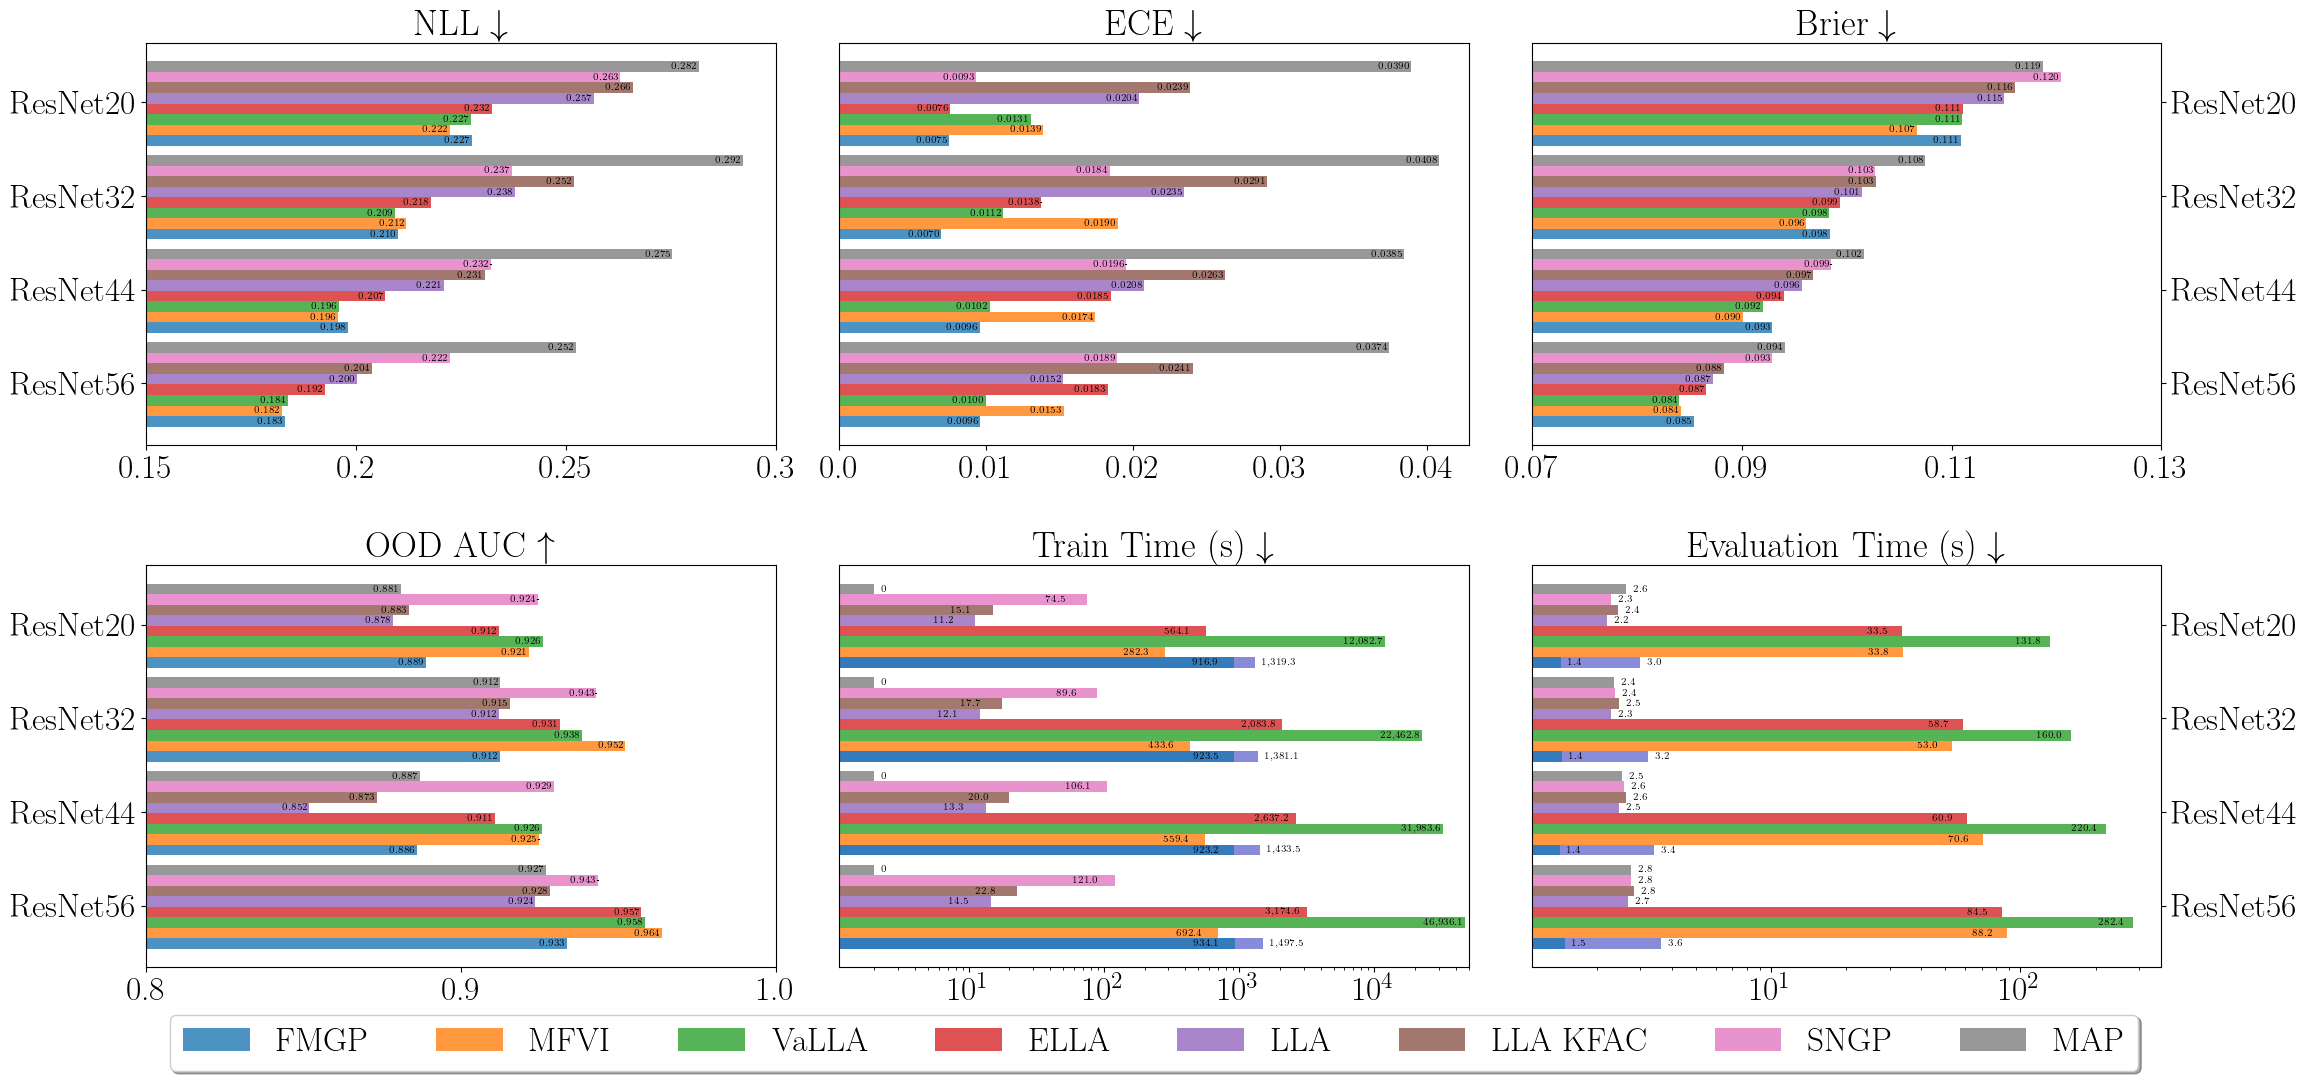

In [11]:
fig, axis = plt.subplots(2, 3, figsize=(26, 12))
plt.subplots_adjust(hspace=0.03, wspace=0.1)
width = 1.8
width_bar = width / 8
jet = plt.colormaps["tab10"]

for i, resnet in enumerate(resnets[::-1]):
    i = 2 * i
    for j, model in enumerate(models):
        bar = axis[0][0].barh(
            i + width_bar * (j - 3.6),
            df.loc[(resnet, model), "NLL"]["mean"],
            yerr=df.loc[(resnet, model), "NLL"]["std"],
            label=labels[j] if i == 0 else None,
            color=jet(j),
            alpha=0.8,
            height=width_bar,
        )
        axis[0][0].bar_label(
            bar, fmt="{:,.3f}", label_type="edge", padding=-20, fontsize=fontsize - 21
        )

        bar = axis[0][1].barh(
            i + width_bar * (j - 3.6),
            df.loc[(resnet, model), "ECE"]["mean"],
            yerr=df.loc[(resnet, model), "ECE"]["std"],
            label=labels[j] if i == 0 else None,
            color=jet(j),
            alpha=0.8,
            height=width_bar,
        )
        axis[0][1].bar_label(
            bar, fmt="{:,.4f}", label_type="edge", padding=-24, fontsize=fontsize - 21
        )

        bar = axis[0][2].barh(
            i + width_bar * (j - 3.6),
            df.loc[(resnet, model), "BRIER"]["mean"],
            yerr=df.loc[(resnet, model), "BRIER"]["std"],
            label=labels[j] if i == 0 else None,
            color=jet(j),
            alpha=0.8,
            height=width_bar,
        )
        axis[0][2].bar_label(
            bar, fmt="{:,.3f}", label_type="edge", padding=-20, fontsize=fontsize - 21
        )

        labels_ood = np.loadtxt("cifar10_ood/labels.txt")
        vec = []
        for seed in [0, 1, 2, 3, 4]:
            if model == "fmgp slow":
                preds = np.loadtxt(f"cifar10_ood/fmgp_{resnet}_{seed}.txt")
            elif model == "ella":
                preds = np.loadtxt(f"cifar10_ood/ella_50_0.5_{resnet}_{seed}.txt")
            elif model == "lla last_layer full":
                preds = np.loadtxt(
                    f"cifar10_ood/lla_last_layer_full_{resnet}_{seed}.txt"
                )
            elif model == "lla last_layer kron":
                preds = np.loadtxt(
                    f"cifar10_ood/lla_last_layer_kron_{resnet}_{seed}.txt"
                )
            else:
                preds = np.loadtxt(f"cifar10_ood/{model}_{resnet}_{seed}.txt")
            vec.append(roc_auc_score(labels_ood, preds))

        bar = axis[1][0].barh(
            i + width_bar * (j - 3.6),
            np.mean(vec),
            yerr=np.std(vec) / np.sqrt(len(vec)),
            label=labels[j] if i == 0 else None,
            color=jet(j),
            alpha=0.8,
            height=width_bar,
        )
        axis[1][0].bar_label(
            bar, fmt="{:,.3f}", label_type="edge", padding=-20, fontsize=fontsize - 21
        )

        bar = axis[1][1].barh(
            i + width_bar * (j - 3.6),
            df.loc[(resnet, model), "train_time"]["mean"] if model != "map" else 2,
            # yerr=df.loc[(resnet, model), "train_time"]["std"],
            label=labels[j] if i == 0 and model != "fmgp slow" else None,
            color=jet(j) if model != "fmgp slow" else plt.colormaps["tab20b"](2),
            alpha=0.8,
            height=width_bar,
        )
        axis[1][1].bar_label(
            bar,
            fmt="{:,.1f}",
            labels="0" if model == "map" else None,
            label_type="edge",
            padding=5 if model in ["map", "fmgp slow"] else -30,
            fontsize=fontsize - 21,
        )
        if model == "fmgp slow":
            bar = axis[1][1].barh(
                i + width_bar * (j - 3.6),
                df.loc[(resnet, "fmgp"), "train_time"]["mean"],
                # yerr=df.loc[(resnet, model), "train_time"]["std"],
                label=labels[j] if i == 0 else None,
                color=jet(j),
                alpha=0.8,
                height=width_bar,
            )
            axis[1][1].bar_label(
                bar,
                fmt="{:,.1f}",
                label_type="edge",
                padding=-30,
                fontsize=fontsize - 21,
            )

        bar = axis[1][2].barh(
            i + width_bar * (j - 3.6),
            df.loc[(resnet, model), "test_time"]["mean"],
            # yerr=df.loc[(resnet, model), "test_time"]["std"],
            label=labels[j] if i == 0 and model != "fmgp slow" else None,
            color=jet(j) if model != "fmgp slow" else plt.colormaps["tab20b"](2),
            alpha=0.8,
            height=width_bar,
        )
        axis[1][2].bar_label(
            bar,
            fmt="{:,.1f}",
            label_type="edge",
            padding=5
            if model
            in [
                "map",
                "sngp",
                "lla last_layer full",
                "lla last_layer kron",
                "fmgp slow",
            ]
            else -25,
            fontsize=fontsize - 21,
        )
        if model == "fmgp slow":
            bar = axis[1][2].barh(
                i + width_bar * (j - 3.6),
                df.loc[(resnet, "fmgp"), "test_time"]["mean"],
                # yerr=df.loc[(resnet, model), "train_time"]["std"],
                color=jet(j),
                alpha=0.8,
                label=labels[j] if i == 0 else None,
                height=width_bar,
            )
            axis[1][2].bar_label(
                bar, fmt="{:,.1f}", label_type="edge", padding=5, fontsize=fontsize - 21
            )

axis[0][0].set_yticks([0, 2, 4, 6])
axis[0][0].set_yticklabels(
    ["ResNet56", "ResNet44", "ResNet32", "ResNet20"], fontsize=fontsize - 4
)
axis[0][0].set_xlim(0.15, 0.30)
axis[0][0].set_xticks([0.15, 0.2, 0.25, 0.3])
tkcs = axis[0][0].get_xticks()
axis[0][0].set_xticklabels(tkcs, fontsize=fontsize - 4)

axis[0][1].set_yticks([])
tkcs = axis[0][1].get_xticks()
axis[0][1].set_xticklabels(tkcs, fontsize=fontsize - 4)

axis[0][2].set_yticks([])
axis[0][2].yaxis.tick_right()
axis[0][2].set_yticks([0, 2, 4, 6])
axis[0][2].set_xlim(0.07, 0.13)
axis[0][2].set_xticks([0.07, 0.09, 0.11, 0.13])
axis[0][2].set_yticklabels(
    ["ResNet56", "ResNet44", "ResNet32", "ResNet20"], fontsize=fontsize - 4
)
tkcs = axis[0][2].get_xticks()
axis[0][2].set_xticklabels(tkcs, fontsize=fontsize - 4)

axis[1][0].set_yticks([0, 2, 4, 6])
axis[1][0].set_yticklabels(
    ["ResNet56", "ResNet44", "ResNet32", "ResNet20"], fontsize=fontsize - 4
)
axis[1][0].set_xlim(0.8, 1)
axis[1][0].set_xticks([0.8, 0.9, 1.0])
tkcs = axis[1][0].get_xticks()
axis[1][0].set_xticklabels(tkcs, fontsize=fontsize - 4)

axis[1][1].set_yticks([])
axis[1][1].set_xlim(1.1, 50_000)
tkcs = axis[1][1].get_xticks()
axis[1][1].set_xticklabels(tkcs, fontsize=fontsize - 4)

axis[1][2].yaxis.tick_right()
axis[1][2].set_yticks([0, 2, 4, 6])
axis[1][2].set_yticklabels(
    ["ResNet56", "ResNet44", "ResNet32", "ResNet20"], fontsize=fontsize - 4
)
tkcs = axis[1][2].get_xticks()
axis[1][2].set_xticklabels(tkcs, fontsize=fontsize - 4)

axis[0][0].set_title("NLL $\downarrow$", fontsize=fontsize - 2)
axis[0][1].set_title("ECE $\downarrow$", fontsize=fontsize - 2)
axis[0][2].set_title("Brier $\downarrow$", fontsize=fontsize - 2)
axis[1][0].set_title(r"OOD AUC $\uparrow$", fontsize=fontsize - 2)
axis[1][1].set_title("Train Time (s) $\downarrow$", fontsize=fontsize - 2)
axis[1][2].set_title("Evaluation Time (s) $\downarrow$", fontsize=fontsize - 2)

axis[1][1].set_xscale("log")
axis[1][2].set_xscale("log")

axis[1][1].legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    fancybox=True,
    shadow=True,
    fontsize=fontsize - 4,
)
fig.subplots_adjust(hspace=0.3)
plt.savefig("cifar10.pdf", bbox_inches="tight", dpi=150)
plt.show()

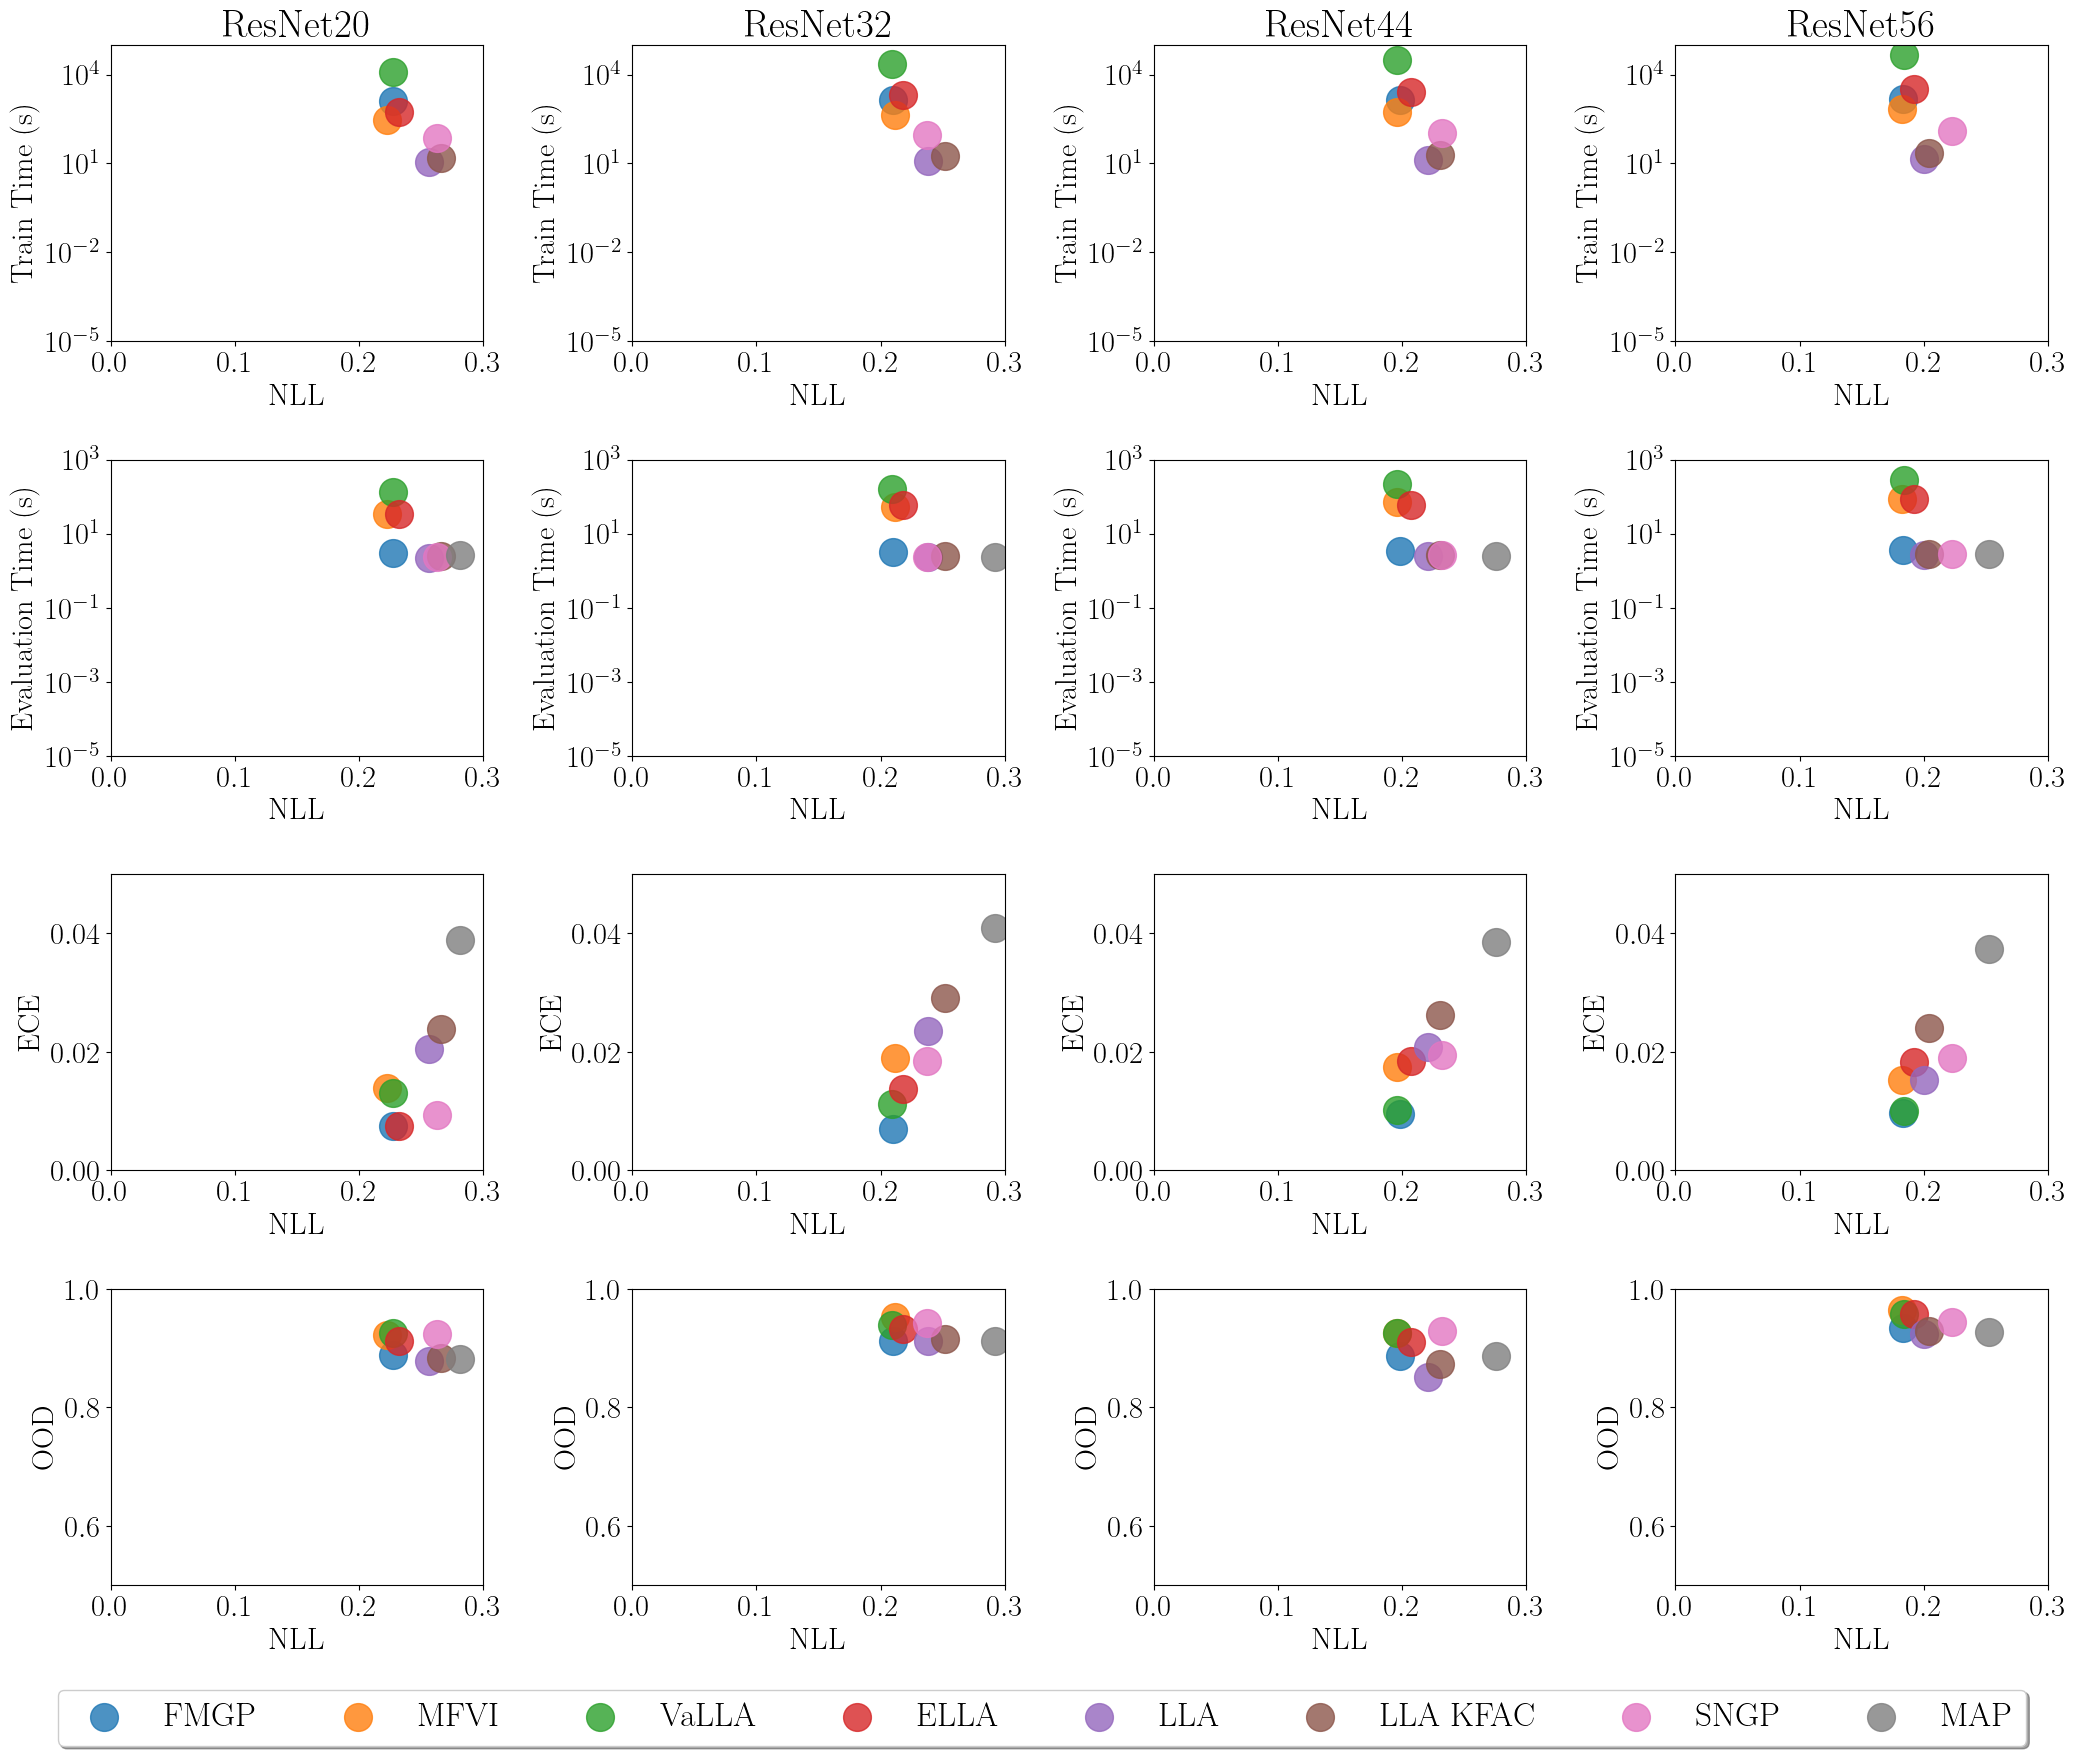

In [12]:
pairs = [("NLL", "train_time"), ("NLL", "test_time"), ("NLL", "ECE"), ("NLL", "OOD")]
sizes = {"resnet20": 1, "resnet32": 2, "resnet44": 3, "resnet56": 4}


fig, axis = plt.subplots(4, 4, figsize=(25, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i, pair in enumerate(pairs):
    x, y = pair
    for model in models:
        for j, resnet in enumerate(resnets):
            if y == "OOD":
                labels_ood = np.loadtxt("cifar10_ood/labels.txt")
                vec = []
                for seed in [0, 1, 2, 3, 4]:
                    if model == "fmgp slow":
                        preds = np.loadtxt(f"cifar10_ood/fmgp_{resnet}_{seed}.txt")
                    elif model == "ella":
                        preds = np.loadtxt(
                            f"cifar10_ood/ella_50_0.5_{resnet}_{seed}.txt"
                        )
                    elif model == "lla last_layer full":
                        preds = np.loadtxt(
                            f"cifar10_ood/lla_last_layer_full_{resnet}_{seed}.txt"
                        )
                    elif model == "lla last_layer kron":
                        preds = np.loadtxt(
                            f"cifar10_ood/lla_last_layer_kron_{resnet}_{seed}.txt"
                        )
                    else:
                        preds = np.loadtxt(f"cifar10_ood/{model}_{resnet}_{seed}.txt")
                    vec.append(roc_auc_score(labels_ood, preds))
                axis[i][j].scatter(
                    df.loc[(resnet, model), x]["mean"],
                    np.mean(vec),
                    s=400,
                    label=labels[models.index(model)] if resnet == "resnet56" else None,
                    color=jet(models.index(model)),
                    alpha=0.8,
                )
            else:
                axis[i][j].scatter(
                    df.loc[(resnet, model), x]["mean"],
                    df.loc[(resnet, model), y]["mean"],
                    s=400,
                    label=labels[models.index(model)] if resnet == "resnet56" else None,
                    color=jet(models.index(model)),
                    alpha=0.8,
                )

            axis[i][j].set_xlim(0, 0.3)
            if y == "train_time":
                axis[i][j].set_ylim(0.00001, 100_000)
            if y == "test_time":
                axis[i][j].set_ylim(0.00001, 1000)
            if y == "ECE":
                axis[i][j].set_ylim(0, 0.05)
            if y == "OOD":
                axis[i][j].set_ylim(0.5, 1)

            axis[i][j].set_xlabel(x, fontsize=fontsize - 6)
            axis[i][j].set_ylabel(y, fontsize=fontsize - 6)
            if y == "train_time":
                axis[i][j].set_yscale("log")
                axis[i][j].set_ylabel("Train Time (s)", fontsize=fontsize - 6)
            if y == "test_time":
                axis[i][j].set_yscale("log")
                axis[i][j].set_ylabel("Evaluation Time (s)", fontsize=fontsize - 6)

            axis[i][j].xaxis.set_tick_params(labelsize=fontsize - 6)
            axis[i][j].yaxis.set_tick_params(labelsize=fontsize - 6)


axis[0][0].set_title("ResNet20", fontsize=fontsize)
axis[0][1].set_title("ResNet32", fontsize=fontsize)
axis[0][2].set_title("ResNet44", fontsize=fontsize)
axis[0][3].set_title("ResNet56", fontsize=fontsize)

plt.legend(
    loc="lower center",
    bbox_to_anchor=(-1.7, -0.6),
    ncol=8,
    fancybox=True,
    shadow=True,
    fontsize=fontsize - 4,
)
plt.savefig("cifar10_pareto.pdf", bbox_inches="tight", dpi=150)
plt.show()

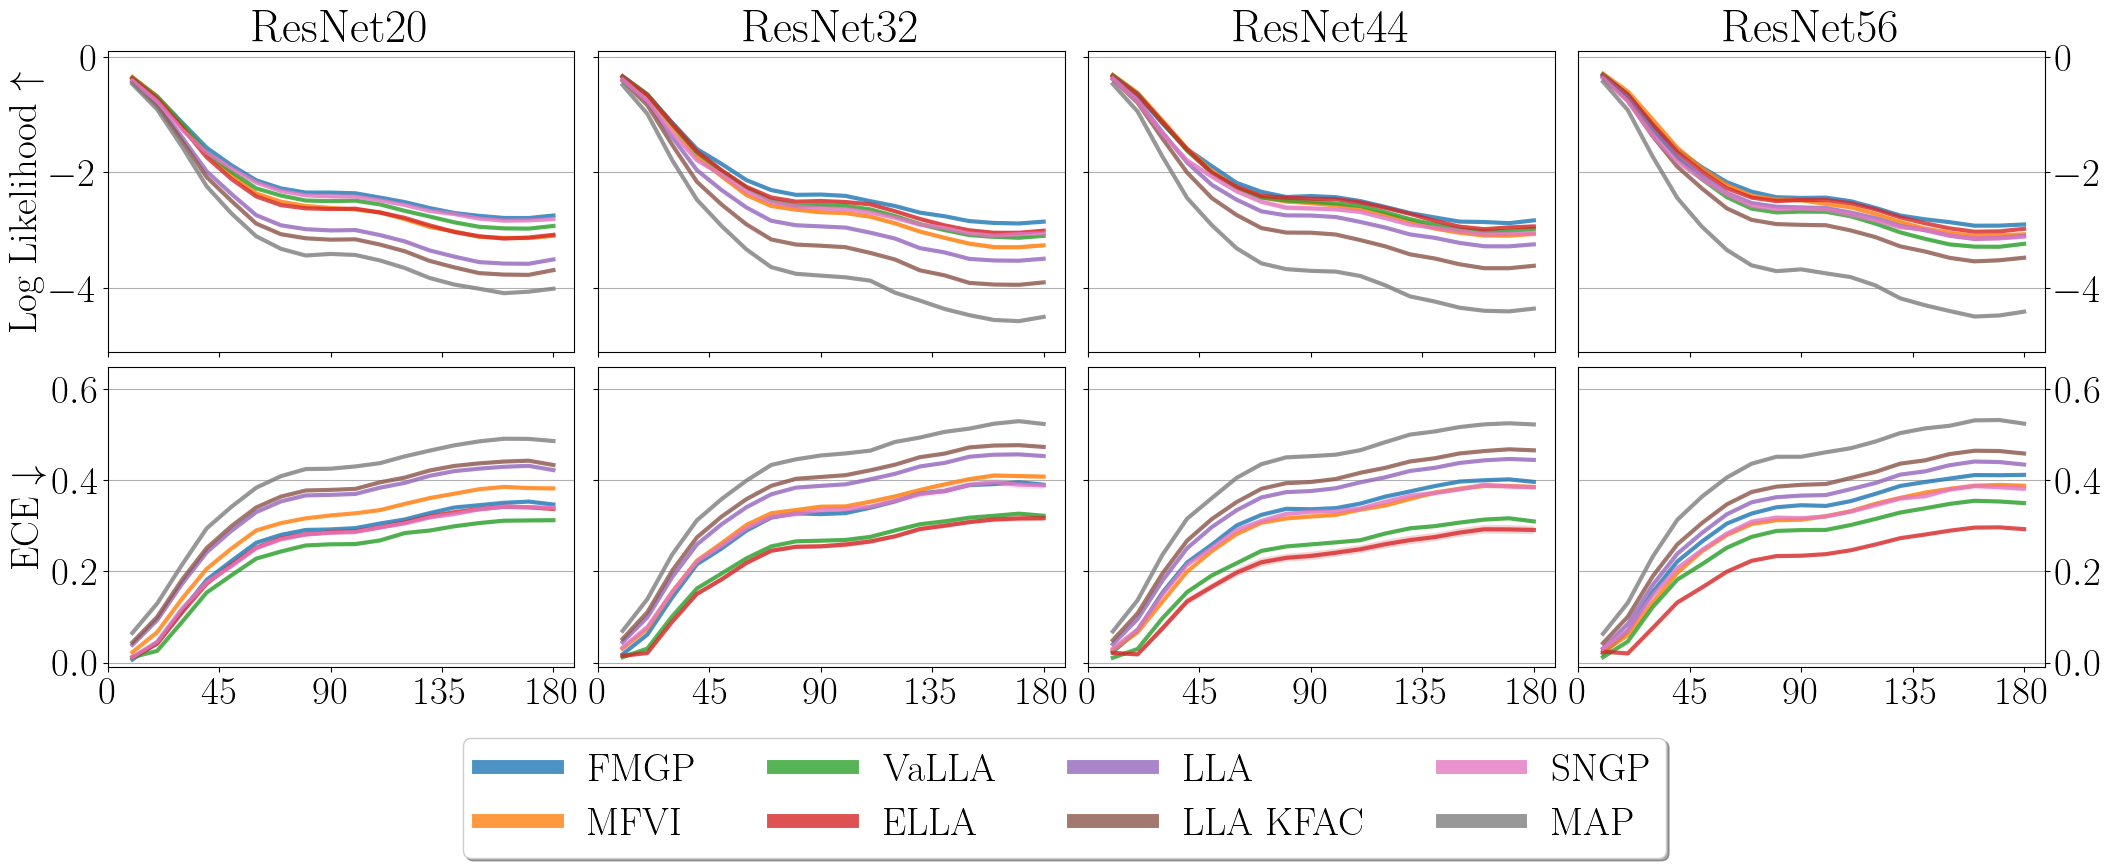

In [13]:
fig, axis = plt.subplots(2, 4, figsize=(25, 8))
plt.subplots_adjust(hspace=0.05, wspace=0.05)
for i, resnet in enumerate(resnets):
    for j, method in enumerate(models):
        if method == "fmgp slow":
            method = "fmgp"
        # plot mean NLL
        mean = []
        std = []
        for angle in np.arange(10, 190, 10):
            mean.append(-df.loc[(resnet, method), f"rotated_{int(angle)}_NLL"]["mean"])
            std.append(df.loc[(resnet, method), f"rotated_{int(angle)}_NLL"]["std"])

        axis[0, i].plot(
            np.arange(10, 190, 10),
            mean,
            label=labels[j],
            linewidth=3,
            color=jet(j),
            alpha=0.8,
        )
        axis[0, i].fill_between(
            np.arange(10, 190, 10),
            np.array(mean) - 2 * np.array(std),
            np.array(mean) + 2 * np.array(std),
            alpha=0.2,
        )
    axis[0, i].set_ylim(-5.1, 0.1)
    axis[0, i].set_xticks(np.arange(0, 181, 45))
    axis[0, i].grid(axis="y")


axis[0, 0].set_xticklabels([])
axis[0, 1].set_xticklabels([])
axis[0, 1].set_yticklabels([])
axis[0, 2].set_xticklabels([])
axis[0, 2].set_yticklabels([])
axis[0, 3].set_xticklabels([])
axis[0, 3].yaxis.tick_right()


axis[0, 0].set_ylabel(r"Log Likelihood $\uparrow$")
axis[0, 0].set_title("ResNet20")
axis[0, 1].set_title("ResNet32")
axis[0, 2].set_title("ResNet44")
axis[0, 3].set_title("ResNet56")
for i, resnet in enumerate(resnets):
    for j, method in enumerate(models):
        if method == "fmgp slow":
            method = "fmgp"
        # plot mean NLL
        mean = []
        std = []
        for angle in np.arange(10, 190, 10):
            mean.append(df.loc[(resnet, method), f"rotated_{int(angle)}_ECE"]["mean"])
            std.append(df.loc[(resnet, method), f"rotated_{int(angle)}_ECE"]["std"])

        axis[1, i].plot(
            np.arange(10, 190, 10),
            mean,
            label=labels[j],
            linewidth=3,
            color=jet(j),
            alpha=0.8,
        )
        axis[1, i].fill_between(
            np.arange(10, 190, 10),
            np.array(mean) - 2 * np.array(std),
            np.array(mean) + 2 * np.array(std),
            alpha=0.2,
        )
    # axis[1, i].set_title("ECE - Rotations " + resnet)
    axis[1, i].set_ylim(-0.01, 0.65)
    axis[1, i].set_yticks([0, 0.2, 0.4, 0.6])
    axis[1, i].set_xticks(np.arange(0, 181, 45))
    axis[1, i].grid(axis="y")


axis[1, 1].set_yticklabels([])
axis[1, 2].set_yticklabels([])
axis[1, 3].yaxis.tick_right()

axis[1, 0].set_ylabel(r"ECE $\downarrow$")

# Legend outside plot
plt.legend(
    handles=[
        plt.Line2D([0], [0], color=jet(i), lw=10, alpha=0.8, label=labels[i])
        for i in range(len(models))
    ],
    loc="lower center",
    bbox_to_anchor=(-1.1, -0.7),
    ncol=4,
    fancybox=True,
    shadow=True,
)
plt.savefig("cifar10_rotations.pdf", bbox_inches="tight", dpi=200)
plt.show()

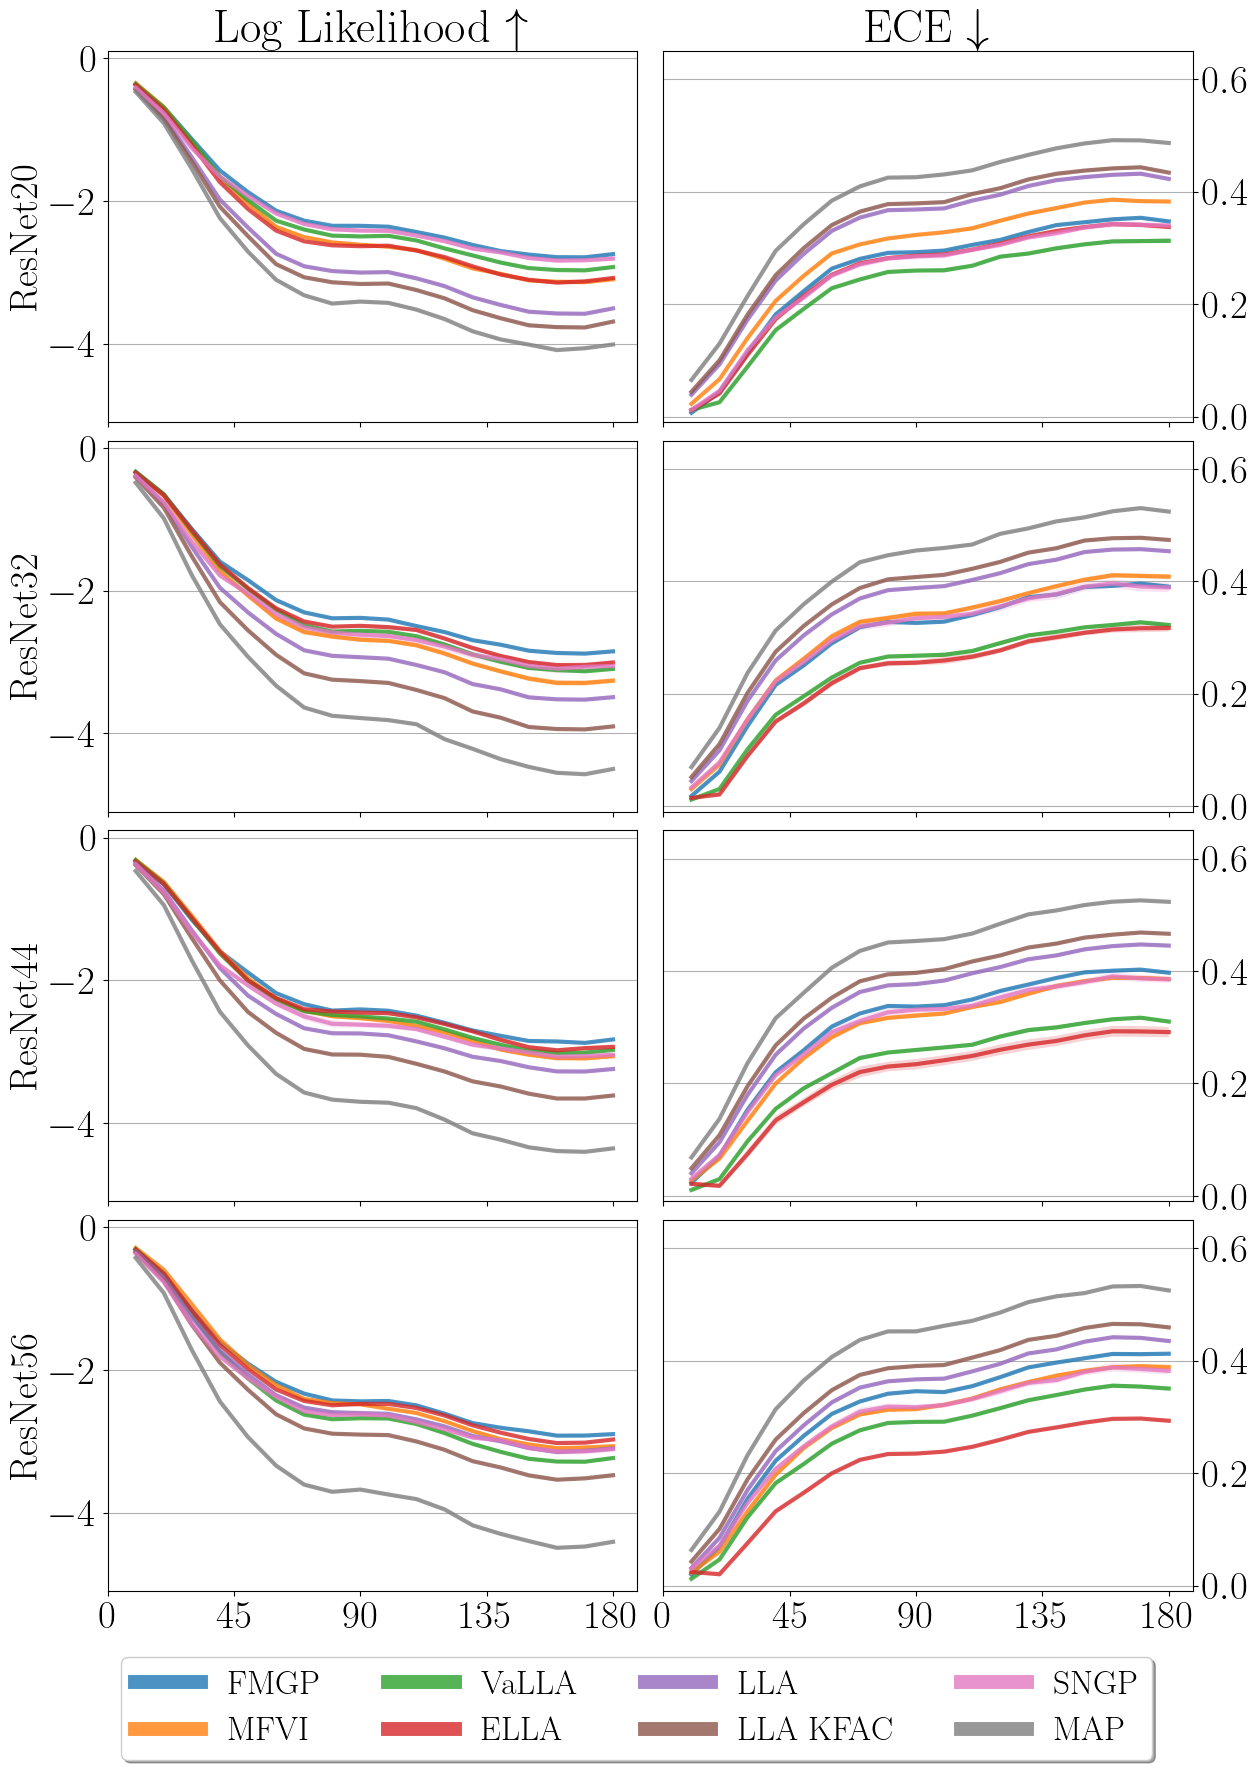

In [14]:
fig, axis = plt.subplots(4, 2, figsize=(14, 20))
plt.subplots_adjust(hspace=0.05, wspace=0.05)
for i, resnet in enumerate(resnets):
    for j, method in enumerate(models):
        if method == "fmgp slow":
            method = "fmgp"
        # plot mean NLL
        mean = []
        std = []
        for angle in np.arange(10, 190, 10):
            mean.append(-df.loc[(resnet, method), f"rotated_{int(angle)}_NLL"]["mean"])
            std.append(df.loc[(resnet, method), f"rotated_{int(angle)}_NLL"]["std"])

        axis[i, 0].plot(
            np.arange(10, 190, 10),
            mean,
            label=labels[j],
            linewidth=3,
            color=jet(j),
            alpha=0.8,
        )
        axis[i, 0].fill_between(
            np.arange(10, 190, 10),
            np.array(mean) - 2 * np.array(std),
            np.array(mean) + 2 * np.array(std),
            alpha=0.2,
        )
    axis[i, 0].set_ylim(-5.1, 0.1)
    axis[i, 0].set_xticks(np.arange(0, 181, 45))
    axis[i, 0].grid(axis="y")


axis[0, 0].set_xticklabels([])
axis[1, 0].set_xticklabels([])
axis[2, 0].set_xticklabels([])


axis[0, 0].set_title(r"Log Likelihood $\uparrow$")
axis[0, 0].set_ylabel("ResNet20")
axis[1, 0].set_ylabel("ResNet32")
axis[2, 0].set_ylabel("ResNet44")
axis[3, 0].set_ylabel("ResNet56")
for i, resnet in enumerate(resnets):
    for j, method in enumerate(models):
        if method == "fmgp slow":
            method = "fmgp"
        # plot mean NLL
        mean = []
        std = []
        for angle in np.arange(10, 190, 10):
            mean.append(df.loc[(resnet, method), f"rotated_{int(angle)}_ECE"]["mean"])
            std.append(df.loc[(resnet, method), f"rotated_{int(angle)}_ECE"]["std"])

        axis[i, 1].plot(
            np.arange(10, 190, 10),
            mean,
            label=labels[j],
            linewidth=3,
            color=jet(j),
            alpha=0.8,
        )
        axis[i, 1].fill_between(
            np.arange(10, 190, 10),
            np.array(mean) - 2 * np.array(std),
            np.array(mean) + 2 * np.array(std),
            alpha=0.2,
        )
    axis[i, 1].set_ylim(-0.01, 0.65)
    axis[i, 1].set_yticks([0, 0.2, 0.4, 0.6])
    axis[i, 1].set_xticks(np.arange(0, 181, 45))
    axis[i, 1].grid(axis="y")

axis[0, 1].set_xticklabels([])
axis[1, 1].set_xticklabels([])
axis[2, 1].set_xticklabels([])
axis[0, 1].yaxis.tick_right()
axis[1, 1].yaxis.tick_right()
axis[2, 1].yaxis.tick_right()
axis[3, 1].yaxis.tick_right()
axis[0, 1].set_title(r"ECE $\downarrow$")

# Legend outside plot
plt.legend(
    handles=[
        plt.Line2D([0], [0], color=jet(i), lw=10, alpha=0.8, label=labels[i])
        for i in range(len(models))
    ],
    loc="lower center",
    fontsize=fontsize - 4,
    bbox_to_anchor=(-0.05, -0.5),
    ncol=4,
    fancybox=True,
    shadow=True,
)
plt.savefig("cifar10_rotations_vertical.pdf", bbox_inches="tight", dpi=200)
plt.show()

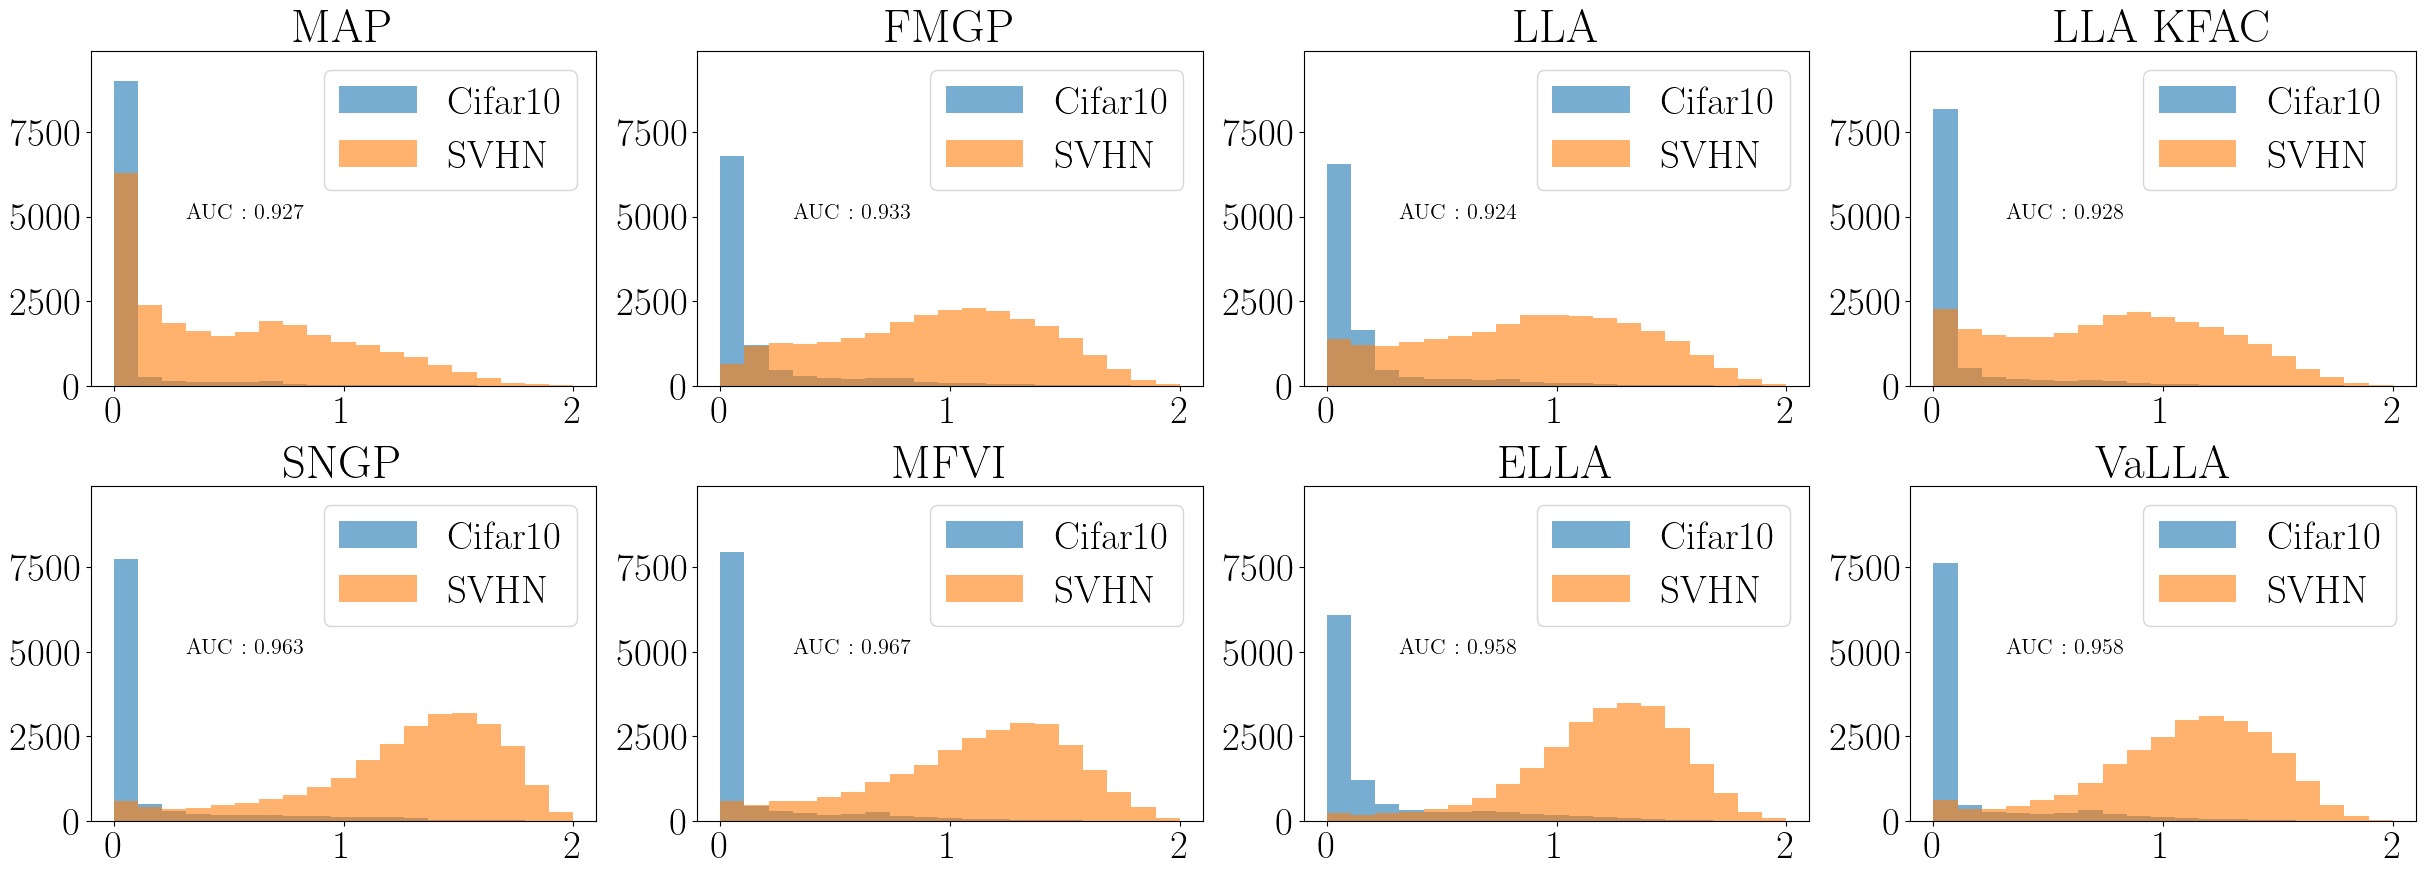

In [15]:
fig, axis = plt.subplots(2, 4, figsize=(30, 10))

bins = np.linspace(0, 2, 20)
true_labels = np.loadtxt("cifar10_ood/labels.txt")


def plot_hist(data, axis):
    auc = roc_auc_score(true_labels, data)
    axis.hist(data[true_labels == 0], bins=bins, alpha=0.6, label="Cifar10")
    axis.hist(data[true_labels == 1], bins=bins, alpha=0.6, label="SVHN")
    axis.set_ylim(0, 9900)
    ylim = axis.get_ylim()
    xlim = axis.get_xlim()
    axis.text(0.15 * xlim[1], 0.5 * ylim[1], "AUC : {:.3f}".format(auc), fontsize=16)
    axis.legend()


seeds = [0, 1, 2, 3, 4]
for resnet in ["resnet56"]:
    vec = np.array(
        [np.loadtxt(f"cifar10_ood/map_{resnet}_{seed}.txt") for seed in seeds]
    )
    plot_hist(vec.mean(0), axis[0][0])
    axis[0][0].set_title("MAP")

    vec = np.array(
        [
            np.loadtxt(f"cifar10_ood/lla_last_layer_full_{resnet}_{seed}.txt")
            for seed in seeds
        ]
    )
    plot_hist(vec.mean(0), axis[0][2])
    axis[0][2].set_title("LLA")

    vec = np.array(
        [
            np.loadtxt(f"cifar10_ood/lla_last_layer_kron_{resnet}_{seed}.txt")
            for seed in seeds
        ]
    )
    plot_hist(vec.mean(0), axis[0][3])
    axis[0][3].set_title("LLA KFAC")

    vec = np.array(
        [np.loadtxt(f"cifar10_ood/fmgp_{resnet}_{seed}.txt") for seed in seeds]
    )
    plot_hist(vec.mean(0), axis[0][1])
    axis[0][1].set_title("FMGP")

    vec = np.array(
        [np.loadtxt(f"cifar10_ood/ella_50_0.5_{resnet}_{seed}.txt") for seed in seeds]
    )
    plot_hist(vec.mean(0), axis[1][2])
    axis[1][2].set_title("ELLA")

    vec = np.array(
        [np.loadtxt(f"cifar10_ood/valla_{resnet}_{seed}.txt") for seed in seeds]
    )
    plot_hist(vec.mean(0), axis[1][3])
    axis[1][3].set_title("VaLLA")

    vec = np.array(
        [np.loadtxt(f"cifar10_ood/sngp_{resnet}_{seed}.txt") for seed in seeds]
    )
    plot_hist(vec.mean(0), axis[1][0])
    axis[1][0].set_title("SNGP")

    vec = np.array(
        [np.loadtxt(f"cifar10_ood/mfvi_{resnet}_{seed}.txt") for seed in seeds]
    )
    plot_hist(vec.mean(0), axis[1][1])
    axis[1][1].set_title("MFVI")

fig.subplots_adjust(hspace=0.3)
plt.savefig("cifar10_ood.pdf", bbox_inches="tight", dpi=150)

plt.show()